In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("test").getOrCreate()
sc = spark.sparkContext

In [2]:
stock_1 = spark.read.csv("stock_market_data/sp500/csv/AAPL.csv", inferSchema=True, header=True)

In [3]:
stock_1.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Volume: long (nullable = true)
 |-- High: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adjusted Close: double (nullable = true)



In [4]:
from pyspark.sql import functions as F 
close_data = stock_1.select(F.collect_list('Close').alias('Close Price'))

In [5]:
close_price_array = close_data.first()['Close Price']

In [6]:
date_array = stock_1.select(F.collect_list('Date').alias('Date')).first()['Date']

In [7]:
days = [i for i in range(1, len(date_array) + 1)]

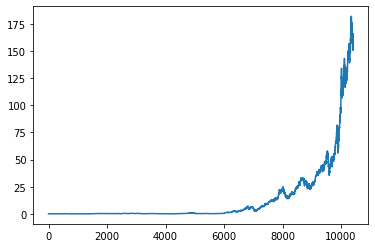

In [8]:
import matplotlib.pyplot as plt
plt.plot(days, close_price_array)

In [9]:
covid_data = spark.read.csv("WHO-COVID-19-global-data.csv", inferSchema=True, header=True)

In [10]:
USA_covid_data = covid_data.filter("Country_code = 'US'")

In [11]:
USA_covid_data.printSchema()

root
 |-- Date_reported: string (nullable = true)
 |-- Country_code: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- WHO_region: string (nullable = true)
 |-- New_cases: integer (nullable = true)
 |-- Cumulative_cases: integer (nullable = true)
 |-- New_deaths: integer (nullable = true)
 |-- Cumulative_deaths: integer (nullable = true)



In [14]:
covid_date_array = USA_covid_data.select(F.collect_list('Date_reported').alias('Date')).first()['Date']

In [15]:
def changeDateMode(date):
    elements = date.split('-')
    return elements[2] + '-' + elements[1] + '-' + elements[0]

In [16]:
covid_date_array = list(map(changeDateMode, covid_date_array))

In [17]:
first_day_index = 0
for i in range(0, 3):
    if covid_date_array[i] in date_array:
        first_day_index = date_array.index(covid_date_array[i])
        break

In [18]:
final_day_index = 0
for i in range(1, 4):
    if covid_date_array[len(covid_date_array) - i] in date_array:
        final_day_index = date_array.index(covid_date_array[len(covid_date_array) - i])
        break

In [19]:
first_day_index

9848

In [20]:
final_day_index

10398

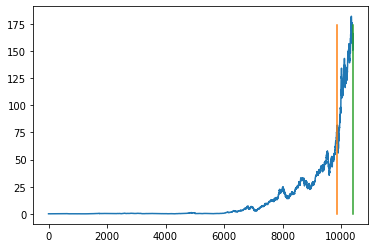

In [27]:
plt.plot(days, close_price_array, [first_day_index] * 175, [i for i in range(0, 175)], [final_day_index] * 175, [i for i in range(0, 175)])

In [ ]:
# def dynamic_warping(list1, list2):
    